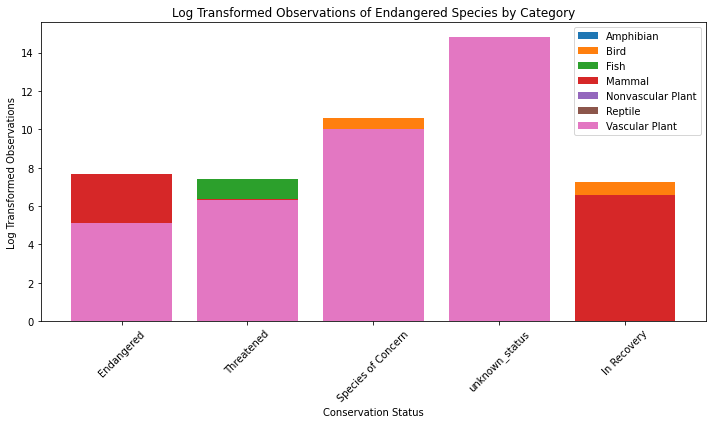


Hypothesis 1: Proportion of endangered species across categories:
Amphibian: Not Supported
Bird: Not Supported
Fish: Not Supported
Mammal: Supported
Vascular Plant: Not Supported

Hypothesis 2 (Revised): Relationship between the number of observations and conservation status:

Category: Amphibian
Conservation Status: Endangered, Observations: 144: Supported
Conservation Status: Threatened, Observations: 564: Supported
Conservation Status: Species of Concern, Observations: 2044: Supported
Conservation Status: In Recovery, Observations: 0: Not Supported
Conservation Status: unknown_status, Observations: 42316: Supported
The expected order of observations for conservation statuses is supported for this category.

Category: Bird
Conservation Status: Endangered, Observations: 574: Supported
Conservation Status: Threatened, Observations: 0: Not Supported
Conservation Status: Species of Concern, Observations: 40758: Supported
The expected order of observations for conservation statuses is no

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the observations and species data
try:
    observations_data = pd.read_csv('C:/Project files/observations.csv')
    species_data = pd.read_csv('C:/Project files/species_info.csv')
except FileNotFoundError:
    print("Error: File not found. Please provide the correct file paths.")
    exit(1)

# Merge the observations and species data on scientific_name
try:
    merged_data = pd.merge(observations_data, species_data, on='scientific_name', how='left')
except pd.errors.MergeError:
    print("Error: Unable to merge the datasets. Please ensure that 'scientific_name' column exists in both datasets.")
    exit(1)
    
# Fill missing species with 'unknown_specie'
merged_data['scientific_name'].fillna('unknown_specie', inplace=True)

# Fill missing conservation_status with 'unknown_status'
merged_data['conservation_status'].fillna('unknown_status', inplace=True)

# Define the order of conservation statuses
conservation_status_order = ['Endangered', 'Threatened', 'Species of Concern', 'In Recovery', 'unknown_status']

# Group by category and conservation_status and sum the observations
grouped_data = merged_data.groupby(['category', 'conservation_status'])['observations'].sum().reset_index()

# Reorder the conservation statuses based on the defined order
grouped_data['conservation_status'] = pd.Categorical(grouped_data['conservation_status'], categories=conservation_status_order, ordered=True)

# Sort the data based on the ordered conservation statuses
grouped_data.sort_values(['category', 'conservation_status'], inplace=True)

# Apply log transformation to the number of observations for eaasy comparison
grouped_data['log_observations'] = np.log1p(grouped_data['observations'])

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a bar plot for each category
for category in grouped_data['category'].unique():
    category_data = grouped_data[grouped_data['category'] == category]
    x = category_data['conservation_status']
    y = category_data['log_observations']
    ax.bar(x, y, label=category)

ax.set_xlabel('Conservation Status')
ax.set_ylabel('Log Transformed Observations')
ax.set_title('Log Transformed Observations of Endangered Species by Category')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hypothesis 1: Certain categories have a higher proportion of endangered species compared to others.
print("\nHypothesis 1: Proportion of endangered species across categories:")
grouped_endangered_counts = grouped_data[grouped_data['conservation_status'] == 'Endangered'].groupby('category')['observations'].sum()
total_endangered_counts = grouped_endangered_counts.sum()

for category, count in grouped_endangered_counts.items():
    proportion = count / total_endangered_counts
    if proportion > 0.2:  # Adjust the threshold based on your dataset
        print(f"{category}: Supported")
    else:
        print(f"{category}: Not Supported")

# Hypothesis 2 (Revised): There is a relationship between the number of observations of a species and its conservation status.
print("\nHypothesis 2 (Revised): Relationship between the number of observations and conservation status:")
for category in grouped_data['category'].unique():
    category_data = grouped_data[grouped_data['category'] == category]
    print(f"\nCategory: {category}")
    supported = True
    previous_observations = None
    for status in conservation_status_order:
        if status in category_data['conservation_status'].values:
            observations = category_data[category_data['conservation_status'] == status]['observations'].values[0]
            if previous_observations is not None and observations < previous_observations:
                supported = False
                break
            previous_observations = observations
            print(f"Conservation Status: {status}, Observations: {observations}: Supported")
        else:
            print(f"Conservation Status: {status}, Observations: 0: Not Supported")
            
    if supported:
        print("The expected order of observations for conservation statuses is supported for this category.")
    else:
        print("The expected order of observations for conservation statuses is not supported for this category.")

# Hypothesis 3: The conservation categories is unknown.
print("\nHypothesis 3: The conservation status is not known in most of the categories:")
unknown_status_counts = grouped_data[grouped_data['conservation_status'] == 'unknown_status'].groupby('category')['observations'].sum()
for category, count in unknown_status_counts.items():
    proportion = count / grouped_data[grouped_data['category'] == category]['observations'].sum()
    if proportion > 0.5:
        print(f"{category}: Supported")
    else:
        print(f"{category}: Not Supported")
